In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,100)

## define a callable Kriging model and sampling function

In [5]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_list = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_list.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_list))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std),np.array(Y_list)


## instantiate Bgolearn

In [6]:
Bgolearn = BGOS.Bgolearn()
method_name = 'KG'


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.88888889]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  2.399963272266734
2 -th sampling, result =  3.0445877857288868
3 -th sampling, result =  3.902316135399949
4 -th sampling, result =  3.2249569133434313
5 -th sampling, result =  3.561489796183573
evaluated mean of added datum: [3.22666278]
evaluated std of added datum: 0.5069916916549826
---------------------------------------

1-th iteration 
 new added datum: [7.9, a

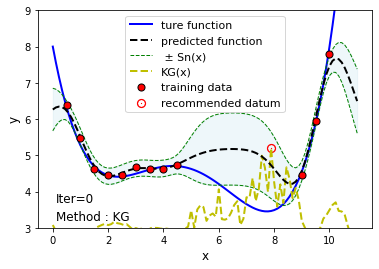

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [6.88888889]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.5777568390124346
2 -th sampling, result =  4.464230933645213
3 -th sampling, result =  3.445225475904328
4 -th sampling, result =  2.6987928328966273
5 -th sampling, result =  3.851124149028218
evaluated mean of added datum: [3.60742605]
evaluated std of added datum: 0.5738130329034833
---------------------------------------

2-th iteration 
 new added datum: [6.9, array([3.6074])]


<Figure size 432x288 with 0 Axes>

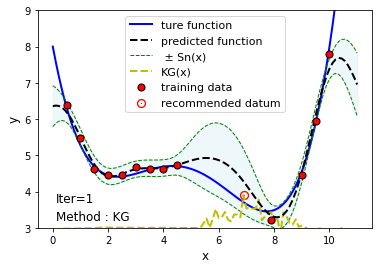

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  4.121922484093806
2 -th sampling, result =  3.0433128644612215
3 -th sampling, result =  3.3878373733914344
4 -th sampling, result =  3.9144823093790806
5 -th sampling, result =  2.0356657597141012
evaluated mean of added datum: [3.30064416]
evaluated std of added datum: 0.7382801317351736
---------------------------------------

3-th iteration 
 new added datum: [8.4, array([3.3006])]


<Figure size 432x288 with 0 Axes>

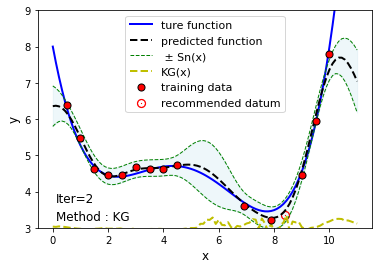

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [10.33333333]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  9.654379863135784
2 -th sampling, result =  9.713392873372984
3 -th sampling, result =  9.637577845198297
4 -th sampling, result =  9.798958649953292
5 -th sampling, result =  9.745077127882888
evaluated mean of added datum: [9.70987727]
evaluated std of added datum: 0.059150740843617204
---------------------------------------

4-th iteration 
 new added datum: [10.3, array([9.7099])]


<Figure size 432x288 with 0 Axes>

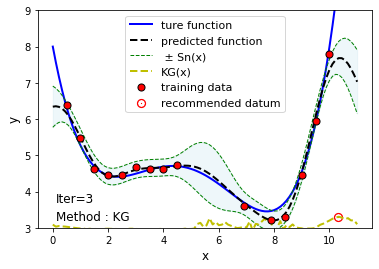

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [11.]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  15.271932105097184
2 -th sampling, result =  15.224982868991152
3 -th sampling, result =  15.312755024361671
4 -th sampling, result =  15.227820027111813
5 -th sampling, result =  15.35946395405776
evaluated mean of added datum: [15.2793908]
evaluated std of added datum: 0.05138147753931487
---------------------------------------

5-th iteration 
 new added datum: [11.0, array([15.2794])]


<Figure size 432x288 with 0 Axes>

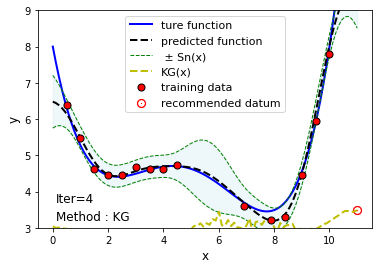

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [6.]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  4.411544169721478
2 -th sampling, result =  5.092020564922676
3 -th sampling, result =  4.428352079040056
4 -th sampling, result =  3.592049994949461
5 -th sampling, result =  4.686779196751855
evaluated mean of added datum: [4.4421492]
evaluated std of added datum: 0.49111552879337184
---------------------------------------

6-th iteration 
 new added datum: [6.0, array([4.4421])]


<Figure size 432x288 with 0 Axes>

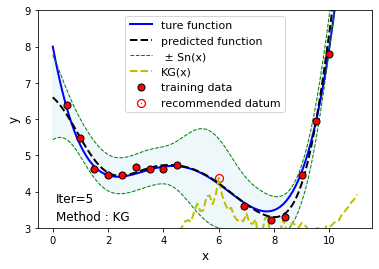

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [11.]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  15.213929760688869
2 -th sampling, result =  15.505671449087949
3 -th sampling, result =  15.046561331120957
4 -th sampling, result =  15.360447252900673
5 -th sampling, result =  15.325556129078695
evaluated mean of added datum: [15.29043318]
evaluated std of added datum: 0.15348573632626525
---------------------------------------

7-th iteration 
 new added datum: [11.0, array([15.2904])]


<Figure size 432x288 with 0 Axes>

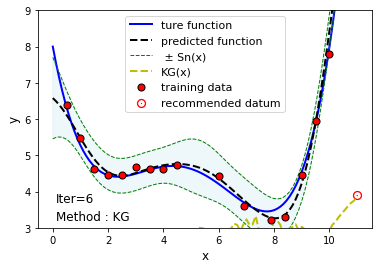

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [11.]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  14.384378666980943
2 -th sampling, result =  15.817527198430936
3 -th sampling, result =  15.061763026475699
4 -th sampling, result =  15.641439479788056
5 -th sampling, result =  15.451964544022532
evaluated mean of added datum: [15.27141458]
evaluated std of added datum: 0.5096159716613866
---------------------------------------

8-th iteration 
 new added datum: [11.0, array([15.2714])]


<Figure size 432x288 with 0 Axes>

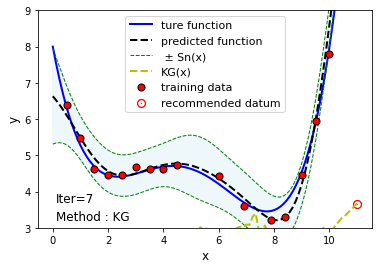

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.88888889]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.542544132046061
2 -th sampling, result =  3.5273687167960337
3 -th sampling, result =  3.4299732917503394
4 -th sampling, result =  2.8116762070143038
5 -th sampling, result =  4.044934182930761
evaluated mean of added datum: [3.47129931]
evaluated std of added datum: 0.3934684353962777
---------------------------------------

9-th iteration 
 new added datum: [7.9, array([3.4713])]


<Figure size 432x288 with 0 Axes>

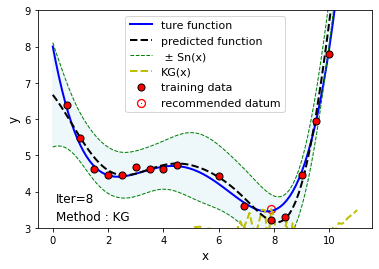

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.55555556]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.508828417588484
2 -th sampling, result =  3.575091463834779
3 -th sampling, result =  3.2596339450392207
4 -th sampling, result =  3.6226633741974004
5 -th sampling, result =  3.467477894957722
evaluated mean of added datum: [3.48673902]
evaluated std of added datum: 0.1254728910101427
---------------------------------------

10-th iteration 
 new added datum: [7.6, array([3.4867])]


<Figure size 432x288 with 0 Axes>

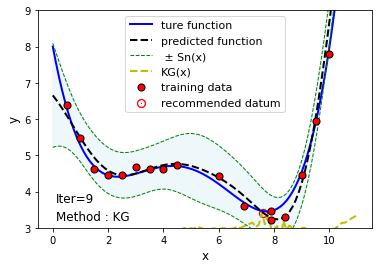

<Figure size 432x288 with 0 Axes>

In [8]:
obs = 5
guessed_noise_std = 0.3

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Knowledge_G()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.55555556]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  3.4856324258639
2 -th sampling, result =  3.3792301585469415
3 -th sampling, result =  3.4605268396510436
4 -th sampling, result =  3.4335637292352557
5 -th sampling, result =  3.4819014607044596
evaluated mean of added datum: [3.44817092]
evaluated std of added datum: 0.039140723447566396
---------------------------------------

1-th iteration 
 new added datum: [7.6,

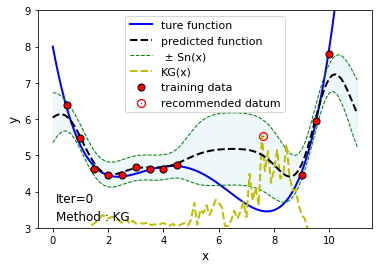

<Figure size 432x288 with 0 Axes>

In [10]:
obs = 5
guessed_noise_std = 0.5

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Knowledge_G()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.626376656460415
2 -th sampling, result =  3.8201199585808063
3 -th sampling, result =  4.2043918043117525
4 -th sampling, result =  4.096149454416465
5 -th sampling, result =  2.932485709293342
evaluated mean of added datum: [3.73590472]
evaluated std of added datum: 0.45029482047177377
---------------------------------------

1-th iteration 
 new added datum: [8.1, 

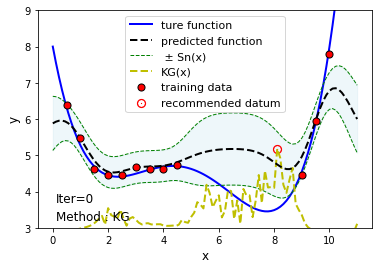

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.55555556]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  3.467654334206144
2 -th sampling, result =  3.597345405714279
3 -th sampling, result =  3.4688714299073773
4 -th sampling, result =  3.552341610123279
5 -th sampling, result =  3.431815109770448
evaluated mean of added datum: [3.50360558]
evaluated std of added datum: 0.06134359042261512
---------------------------------------

2-th iteration 
 new added datum: [7.6, array([3.5036])]


<Figure size 432x288 with 0 Axes>

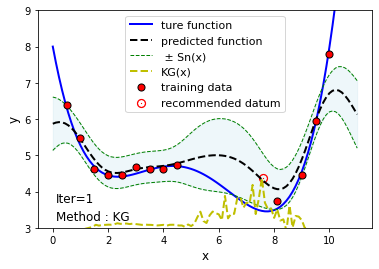

<Figure size 432x288 with 0 Axes>

In [9]:
obs = 5
guessed_noise_std = 0.7

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Knowledge_G()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数
